In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv("salary1.csv")
df.columns=["age","statut","f3","etudes","nombre_annees_etudes","situation_familiale1","secteur_activite","situation_familiale2","ethnie","genre", "plus-value","moins-value", "nb_h_hebdo","pays_naissance","salary"]

df

,age,statut,f3,etudes,nombre_annees_etudes,situation_familiale1,secteur_activite,situation_familiale2,ethnie,genre,plus-value,moins-value,nb_h_hebdo,pays_naissance,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
#On supprime la colonne f3 qui est non informative
del df['f3']

In [21]:
#Avant d'effectuer une visualisation des données, on séparer notre base en appretissage/test

from sklearn.model_selection import train_test_split

#On récupère nos X et nos y
X = df.iloc[:,0:13]
y = df.iloc[:,13:14]

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# transformation de la classe avec le labelEncoder
y = y.apply(LabelEncoder().fit_transform)
y

,salary
0,0
1,0
2,0
3,0
4,0
...,...
32555,0
32556,1
32557,0
32558,0


In [23]:
X = pd.concat([X, pd.get_dummies(X['statut'], prefix='statut')], axis=1)
X = pd.concat([X, pd.get_dummies(X['situation_familiale1'], prefix='sf1')], axis=1)
X = pd.concat([X, pd.get_dummies(X['secteur_activite'], prefix='se')], axis=1)
X = pd.concat([X, pd.get_dummies(X['situation_familiale2'], prefix='sf2')], axis=1)
X = pd.concat([X, pd.get_dummies(X['ethnie'], prefix='et')], axis=1)
X = pd.concat([X, pd.get_dummies(X['genre'], prefix='s')], axis=1)
X = pd.concat([X, pd.get_dummies(X['pays_naissance'], prefix='pn')], axis=1)

In [24]:
X

,age,statut,etudes,nombre_annees_etudes,situation_familiale1,secteur_activite,situation_familiale2,ethnie,genre,plus-value,...,pn_ Portugal,pn_ Puerto-Rico,pn_ Scotland,pn_ South,pn_ Taiwan,pn_ Thailand,pn_ Trinadad&Tobago,pn_ United-States,pn_ Vietnam,pn_ Yugoslavia
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,0,0,0,0,0,0,0,1,0,0
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,0,0,0,0,0,0,0,1,0,0
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,0,0,0,0,0,0,0,1,0,0
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,0,0,0,0,0,0,0,0,0,0
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,...,0,0,0,0,0,0,0,1,0,0
32556,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,...,0,0,0,0,0,0,0,1,0,0
32557,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,...,0,0,0,0,0,0,0,1,0,0
32558,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
#On supprime nos variables qualitatives
del X['statut']
del X['situation_familiale1']
del X['secteur_activite']
del X['situation_familiale2']
del X['ethnie']
del X['genre']
del X['pays_naissance']


In [26]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(X[["etudes"]])
X[["etudes"]] = enc.transform(X[["etudes"]])

In [27]:
#Normalisation des données
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X)

[[ 0.83709708 -0.33544266  1.13477863 ...  0.34095976 -0.04540906
  -0.022173  ]
 [-0.04264043  0.18131885 -0.42002663 ...  0.34095976 -0.04540906
  -0.022173  ]
 [ 1.05703146 -2.40248871 -1.19742926 ...  0.34095976 -0.04540906
  -0.022173  ]
 ...
 [ 1.42358875  0.18131885 -0.42002663 ...  0.34095976 -0.04540906
  -0.022173  ]
 [-1.21562378  0.18131885 -0.42002663 ...  0.34095976 -0.04540906
  -0.022173  ]
 [ 0.98372     0.18131885 -0.42002663 ...  0.34095976 -0.04540906
  -0.022173  ]]


In [28]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,0.837097,-0.335443,1.134779,-0.145914,-0.216663,-2.222120,-0.244454,-0.174298,-0.262102,-0.014664,...,-0.033729,-0.059275,-0.019201,-0.049629,-0.039608,-0.023519,-0.024164,0.340960,-0.045409,-0.022173
1,-0.042640,0.181319,-0.420027,-0.145914,-0.216663,-0.035430,-0.244454,-0.174298,-0.262102,-0.014664,...,-0.033729,-0.059275,-0.019201,-0.049629,-0.039608,-0.023519,-0.024164,0.340960,-0.045409,-0.022173
2,1.057031,-2.402489,-1.197429,-0.145914,-0.216663,-0.035430,-0.244454,-0.174298,-0.262102,-0.014664,...,-0.033729,-0.059275,-0.019201,-0.049629,-0.039608,-0.023519,-0.024164,0.340960,-0.045409,-0.022173
3,-0.775755,-0.335443,1.134779,-0.145914,-0.216663,-0.035430,-0.244454,-0.174298,-0.262102,-0.014664,...,-0.033729,-0.059275,-0.019201,-0.049629,-0.039608,-0.023519,-0.024164,-2.932897,-0.045409,-0.022173
4,-0.115952,0.439700,1.523480,-0.145914,-0.216663,-0.035430,-0.244454,-0.174298,-0.262102,-0.014664,...,-0.033729,-0.059275,-0.019201,-0.049629,-0.039608,-0.023519,-0.024164,0.340960,-0.045409,-0.022173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,-0.852204,0.746077,-0.145914,-0.216663,-0.197407,-0.244454,-0.174298,-0.262102,-0.014664,...,-0.033729,-0.059275,-0.019201,-0.049629,-0.039608,-0.023519,-0.024164,0.340960,-0.045409,-0.022173
32556,0.103982,0.181319,-0.420027,-0.145914,-0.216663,-0.035430,-0.244454,-0.174298,-0.262102,-0.014664,...,-0.033729,-0.059275,-0.019201,-0.049629,-0.039608,-0.023519,-0.024164,0.340960,-0.045409,-0.022173
32557,1.423589,0.181319,-0.420027,-0.145914,-0.216663,-0.035430,-0.244454,-0.174298,-0.262102,-0.014664,...,-0.033729,-0.059275,-0.019201,-0.049629,-0.039608,-0.023519,-0.024164,0.340960,-0.045409,-0.022173
32558,-1.215624,0.181319,-0.420027,-0.145914,-0.216663,-1.655200,-0.244454,-0.174298,-0.262102,-0.014664,...,-0.033729,-0.059275,-0.019201,-0.049629,-0.039608,-0.023519,-0.024164,0.340960,-0.045409,-0.022173


In [29]:
#On sépare nos données en train et en test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

data_train_df = (X_train,y_train)

data_test_df = (X_test, y_test)

# Traitement des données avec les algorithmes 

## Neural Network

Avant d'entrainer notre model, nous cherchons les meilleurs hyperparamètres pour notre MLP avec la méthode GridSearchCV

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#On initialise les paramètres à tester
param_grid = {'hidden_layer_sizes': [(1,1),(10,1),(100,1),(1,2),(10,2),(100,2),(1,3),(10,3),(100,3),(1,4),(10,4),(100,4),(1,5),(10,5),(100,5)],
             'activation': ['logistic','tahn','relu'],
             'solver':['sgd','adam'],
             'learning_rate':['constant', 'adaptive']}

grid = GridSearchCV(MLPClassifier(), param_grid, cv = 5)

In [61]:
grid.fit(X_train, y_train)

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 450, in _validate_hyperparameters
    % (self.activation, list(sorted(ACTIVATIONS))))
ValueError: The activation 'tahn' is not supported. Supported a

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 450, in _validate_hyperparameters
    % (self.activation, list(sorted(ACTIVATIONS))))
ValueError: The activation 'tahn' is not supported. Supported a

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 450, in _validate_hyperparameters
    % (self.activation, list(sorted(ACTIVATIONS))))
ValueError: The activation 'tahn' is not supported. Supported a

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 450, in _validate_hyperparameters
    % (self.activation, list(sorted(ACTIVATIONS))))
ValueError: The activation 'tahn' is not supported. Supported a

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 450, in _validate_hyperparameters
    % (self.activation, list(sorted(ACTIVATIONS))))
ValueError: The activation 'tahn' is not supported. Supported a

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 450, in _validate_hyperparameters
    % (self.activation, list(sorted(ACTIVATIONS))))
ValueError: The activation 'tahn' is not supported. Supported a

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 450, in _validate_hyperparameters
    % (self.activation, list(sorted(ACTIVATIONS))))
ValueError: The activation 'tahn' is not supported. Supported a

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 450, in _validate_hyperparameters
    % (self.activation, list(sorted(ACTIVATIONS))))
ValueError: The activation 'tahn' is not supported. Supported a

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 450, in _validate_hyperparameters
    % (self.activation, list(sorted(ACTIVATIONS))))
ValueError: The activation 'tahn' is not supported. Supported a

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 450, in _validate_hyperparameters
    % (self.activation, list(sorted(ACTIVATIONS))))
ValueError: The activation 'tahn' is not supported. Supported a

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 450, in _validate_hyperparameters
    % (self.activation, list(sorted(ACTIVATIONS))))
ValueError: The activation 'tahn' is not supported. Supported a

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 450, in _validate_hyperparameters
    % (self.activation, list(sorted(ACTIVATIONS))))
ValueError: The activation 'tahn' is not supported. Supported a

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 450, in _validate_hyperparameters
    % (self.activation, list(sorted(ACTIVATIONS))))
ValueError: The activation 'tahn' is not supported. Supported a

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tahn', 'relu'],
                         'hidden_layer_sizes': [(1, 1), (10, 1), (100, 1),
                                                (1, 2), (10, 2), (100, 2),
                                                (1, 3), (10, 3), (100, 3),
                                                (1, 4), (10, 4), (100, 4),
                                                (1, 5), (10, 5), (100, 5)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [62]:
score_train_mean = grid.best_score_

In [ ]:
grid.best_params_

In [63]:
grid.best_estimator_

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 2))

In [64]:
clf_mlp = grid.best_estimator_

In [68]:
(y_train).shape

(22792, 1)

In [65]:
score_mlp = cross_val_score(clf_mlp, X_train, y_train, cv=5)

print("Accuracy à chaque Fold sur la base train : ", score_mlp)
print("Accuracy sur l'ensemble de la base train : ", score_train_mean)
print("Accuracy sur la base test : ", clf_mlp.score(X_test,y_test))

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_

Accuracy à chaque Fold sur la base train :  [0.85216056 0.85325729 0.85125055 0.84795963 0.85015358]
Accuracy sur l'ensemble de la base train :  0.8528429702479153
Accuracy sur la base test :  0.8509418509418509


C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [82]:
#Création du tableau des taux d'erreur par rapport à gamma
data_mlp = {'MLP Classifier ':{'% Accuracy en Train' : 85,'% Accuracy en Test' : 85,'Couche cachées' : 2, 'Neuronnes par couches cachées' : 10, 'Nombre de poids' : 228030, 'Nombre de biais' : 110}}
          
       
df_mlp= pd.DataFrame(data_mlp)        
df_mlp

,MLP Classifier
% Accuracy en Test,85
% Accuracy en Train,85
Couche cachées,2
Neuronnes par couches cachées,10
Nombre de biais,110
Nombre de poids,228030


In [33]:

#clf_mlp = MLPClassifier(hidden_layer_sizes = (10,5), max_iter=300, activation = 'relu', solver = 'adam').fit(X_train, y_train)
#score_mlp = cross_val_score(clf_mlp, X_train, y_train, cv=5)
#score_mlp_test = clf_mlp.score(X_test,y_test)
#print("Accuracy à chaque Fold sur la base train : ", score_mlp)
#print("Accuracy sur l'ensemble de la base train : ", score_mlp.mean())
#print("Accuracy sur la base test : ", score_mlp_test)

In [80]:
#Matrice de confusion sur la base test 
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

predictions = clf_mlp.predict(X_test)
confusion_matrix(y_test, predictions)

clf_mlp.score(X_test,y_test)


,salary
14160,0
27047,0
28867,1
5667,1
7827,0
...,...
27166,0
32475,0
21100,0
27130,0


# SVC Linéaire

In [35]:
#from sklearn.svm import LinearSVC
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
#import numpy as np



#On initialise les paramètres à tester
#param_grid = {'C' : np.arange(1,10)}
#grid = GridSearchCV(LinearSVC(), param_grid, cv = 5)



In [36]:
#grid.fit(X_train, y_train)

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 450, in _validate_hyperparameters
    % (self.activation, list(sorted(ACTIVATIONS))))
ValueError: The activation 'tahn' is not supported. Supported a

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 450, in _validate_hyperparameters
    % (self.activation, list(sorted(ACTIVATIONS))))
ValueError: The activation 'tahn' is not supported. Supported a

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tahn', 'relu'],
                         'hidden_layer_sizes': [array([1, 2, 3, 4]),
                                                array([1, 2, 3, 4])],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [37]:
#clf_svc = LinearSVC(C=1, loss="hinge", random_state=42).fit(X_train, y_train)

#score_svc = cross_val_score(clf_svc, X_train, y_train, cv=5, scoring="accuracy")

#print("Accuracy à chaque Fold sur la base train : ", score_svc)
#print("Accuracy sur l'ensemble de la base train : ", score_svc.mean())
#print("Accuracy sur la base test :",clf_svc.score(X_test,y_test))#

In [38]:
#fig = plot_confusion_matrix(clf_svc, X_test, y_test, display_labels=clf_svc.classes_)
#fig.figure_.suptitle("Confusion Matrix for Salary Dataset")
#plt.show()

# SVC Non Linéaire

In [39]:
##from sklearn import svm

#On initialise les paramètres à tester
##param_grid = {'kernel': 'rbf',
             #'gamma': np.arange(1,5),##
             #'C': np.arange(0.1,10)}

##grid = GridSearchCV(SVC(), param_grid, cv = 5)


In [40]:
#grid.fit(X_train, y_train)

In [41]:
# fit the model
#clf_nsvc = svm.SVC(kernel = "rbf", gamma=0.1, C=1).fit(X_train, y_train)


#score_nsvc = cross_val_score(clf_nsvc, X_train, y_train, cv=5, scoring="accuracy")

#print("Accuracy à chaque Fold sur la base train : ", score_nsvc)
#print("Accuracy sur l'ensemble de la base train : ", score_nsvc.mean())
#print("Accuracy sur la base test :",clf_nsvc.score(X_test,y_test))#



#fig = plot_confusion_matrix(clf_nsvc, X_test, y_test, display_labels=clf_nsvc.classes_)
#fig.figure_.suptitle("Confusion Matrix for Salary Dataset")
#plt.show()

# Decision Tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

#On initialise les paramètres à tester
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,10),
             'min_samples_split': np.arange(1,100)}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

In [85]:
grid.fit(X_train, y_train)

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 907, in fit
    X_idx_sorted=X_idx_sorted)
  File "C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 241, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.76009127 0.76009127 ... 0.85433445 0.85433446 0.85433446]
  category=UserWarning


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [86]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=16)

In [87]:
clf_decision_tree = grid.best_estimator_
score_train_mean = grid.best_score_

In [88]:
score_decision_tree = cross_val_score(clf_decision_tree, X_train, y_train, cv=5)

print("Accuracy à chaque Fold sur la base train : ", score_decision_tree)
print("Accuracy sur l'ensemble de la base train : ", score_train_mean)
print("Accuracy sur la base test : ", clf_decision_tree.score(X_test,y_test))

Accuracy à chaque Fold sur la base train :  [0.8561088  0.86225049 0.85256692 0.85344449 0.85432207]
Accuracy sur l'ensemble de la base train :  0.8555630382058219
Accuracy sur la base test :  0.851965601965602


In [ ]:
#clf_dtrees = DecisionTreeClassifier(criterion="entropy", max_depth=6)
#clf_dtrees.fit(X_train,y_train)

#score_dtrees = cross_val_score(clf_dtrees, X_train, y_train, cv=5, scoring="accuracy")

#print("Accuracy à chaque Fold sur la base train : ", score_dtrees)
#print("Accuracy sur l'ensemble de la base train : ", score_dtrees.mean())
#print("Accuracy sur la base test :",clf_dtrees.score(X_test,y_test))#

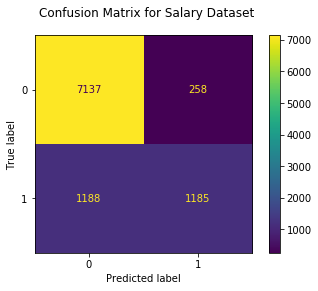

In [91]:
fig = plot_confusion_matrix(clf_decision_tree, X_test, y_test, display_labels=clf_decision_tree.classes_)
fig.figure_.suptitle("Confusion Matrix for Salary Dataset")
plt.show()